In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [57]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [58]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [59]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

2


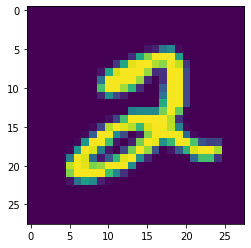

1


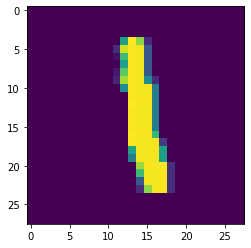

3


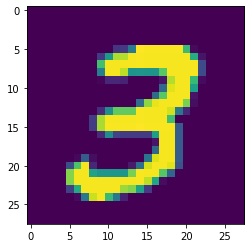

1


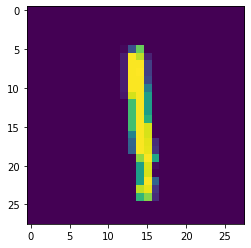

4


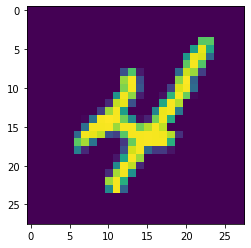

3


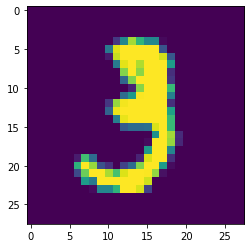

5


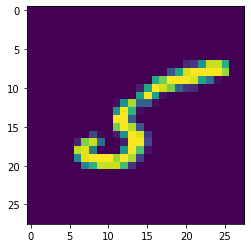

3


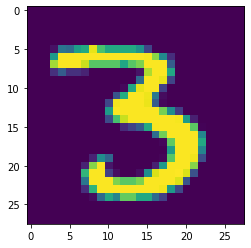

6


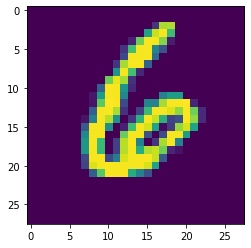

1


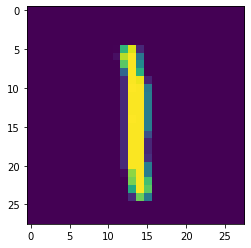

In [60]:
for i in range(5,15):
    img = x_train[i]
    y = np.argmax(y_train[i])
    print(y)
    plt.imshow(img)
    plt.show()

In [61]:
model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(28,28,1),activation="tanh"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="sigmoid"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="tanh"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [62]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [63]:
model.fit(x_train,y_train,epochs=21,batch_size=10,validation_split=0.2)

Epoch 1/21
4800/4800 [==============================] - 44s 9ms/step - loss: 0.5966 - accuracy: 0.8174 - val_loss: 0.2374 - val_accuracy: 0.9328
Epoch 2/21
4800/4800 [==============================] - 43s 9ms/step - loss: 0.2163 - accuracy: 0.9394 - val_loss: 0.2164 - val_accuracy: 0.9376
Epoch 3/21
4800/4800 [==============================] - 43s 9ms/step - loss: 0.1755 - accuracy: 0.9498 - val_loss: 0.1743 - val_accuracy: 0.9506
Epoch 4/21
4800/4800 [==============================] - 44s 9ms/step - loss: 0.1592 - accuracy: 0.9540 - val_loss: 0.2710 - val_accuracy: 0.9235
Epoch 5/21
4800/4800 [==============================] - 43s 9ms/step - loss: 0.1458 - accuracy: 0.9586 - val_loss: 0.2043 - val_accuracy: 0.9453
Epoch 6/21
4800/4800 [==============================] - 43s 9ms/step - loss: 0.1337 - accuracy: 0.9609 - val_loss: 0.3269 - val_accuracy: 0.9105
Epoch 7/21
4800/4800 [==============================] - 45s 9ms/step - loss: 0.1339 - accuracy: 0.9619 - val_loss: 0.1680 - val_ac

In [64]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss *  100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.4338 - accuracy: 0.8722
Accuracy: 87.22%
Loss: 43.38%


In [66]:
y_pred = model.predict(x_test)

pred_classes = np.argmax(y_pred,axis=1)
actual_classes = np.argmax(y_test,axis=1)

cnf_mtx = confusion_matrix(pred_classes,actual_classes)

313/313 [==============================] - 2s 5ms/step


<AxesSubplot:>

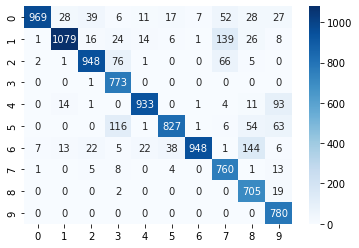

In [71]:
sns.heatmap(cnf_mtx,fmt="d",annot=True,cmap="Blues",xticklabels=[0,1,2,3,4,5,6,7,8,9],yticklabels=[0,1,2,3,4,5,6,7,8,9])